# **IMPLEMENTATION DU FRAMEWORK DE MON ARTICLE DE BASE SANS OPTIMISATION DE PARAMETRES**

## **Thème :** Apprentissage par ensemble pour la prédiction de la résistance à la compression des bétons de hautes performances (BHPs) 

### **Auteur** : ANANJOU TSAFACK Ornéla Stéla

### **Encadreurs**: Dr. TIOGNING Lauraine et Dr. MELATAGIA Paulin

## **I) Thématique**


*   **Thème** : Prédiction de la résistance mécanique des bétons de hautes performances (BHPs).

*   **Question Scientifique** : Quel modèle d'apprentissage par ensemble permet de prédire au mieux la résistance à la compression des BHPs?

*   **Objectif Scientifique** : Construire un modèle d'apprentissage par ensemble qui prédise efficacement la résistance à la compression des BHPs



##  **II) Données utilisées**

### **1) Informations sur les Données** :
Le jeu de donné provient de https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength sous
le nom de **Concrete Compressive Strength DataSet** .
Il compte **1030 observations** , **9 variables**( *ciment, scories de haut fourneaux, cendres volantes, l’eau, le super-plastifiant, les agrégats de coarse, les particules fines, l’âge* ) et une variable cible correspondant à la ***résistance mécanique***.


### **2) Présentation des données**

In [1]:
# Importation des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [2]:
#creation d'un dataframe panda
df=pd.read_excel("Concrete_Data.xls")
df.head(20)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


### **3) Visualisation des données**

In [3]:
# Renommage des noms des variables caracteristiques
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age", "CC_Strength"]
curr_col_names = list(df.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = df.rename(columns=mapper)

data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


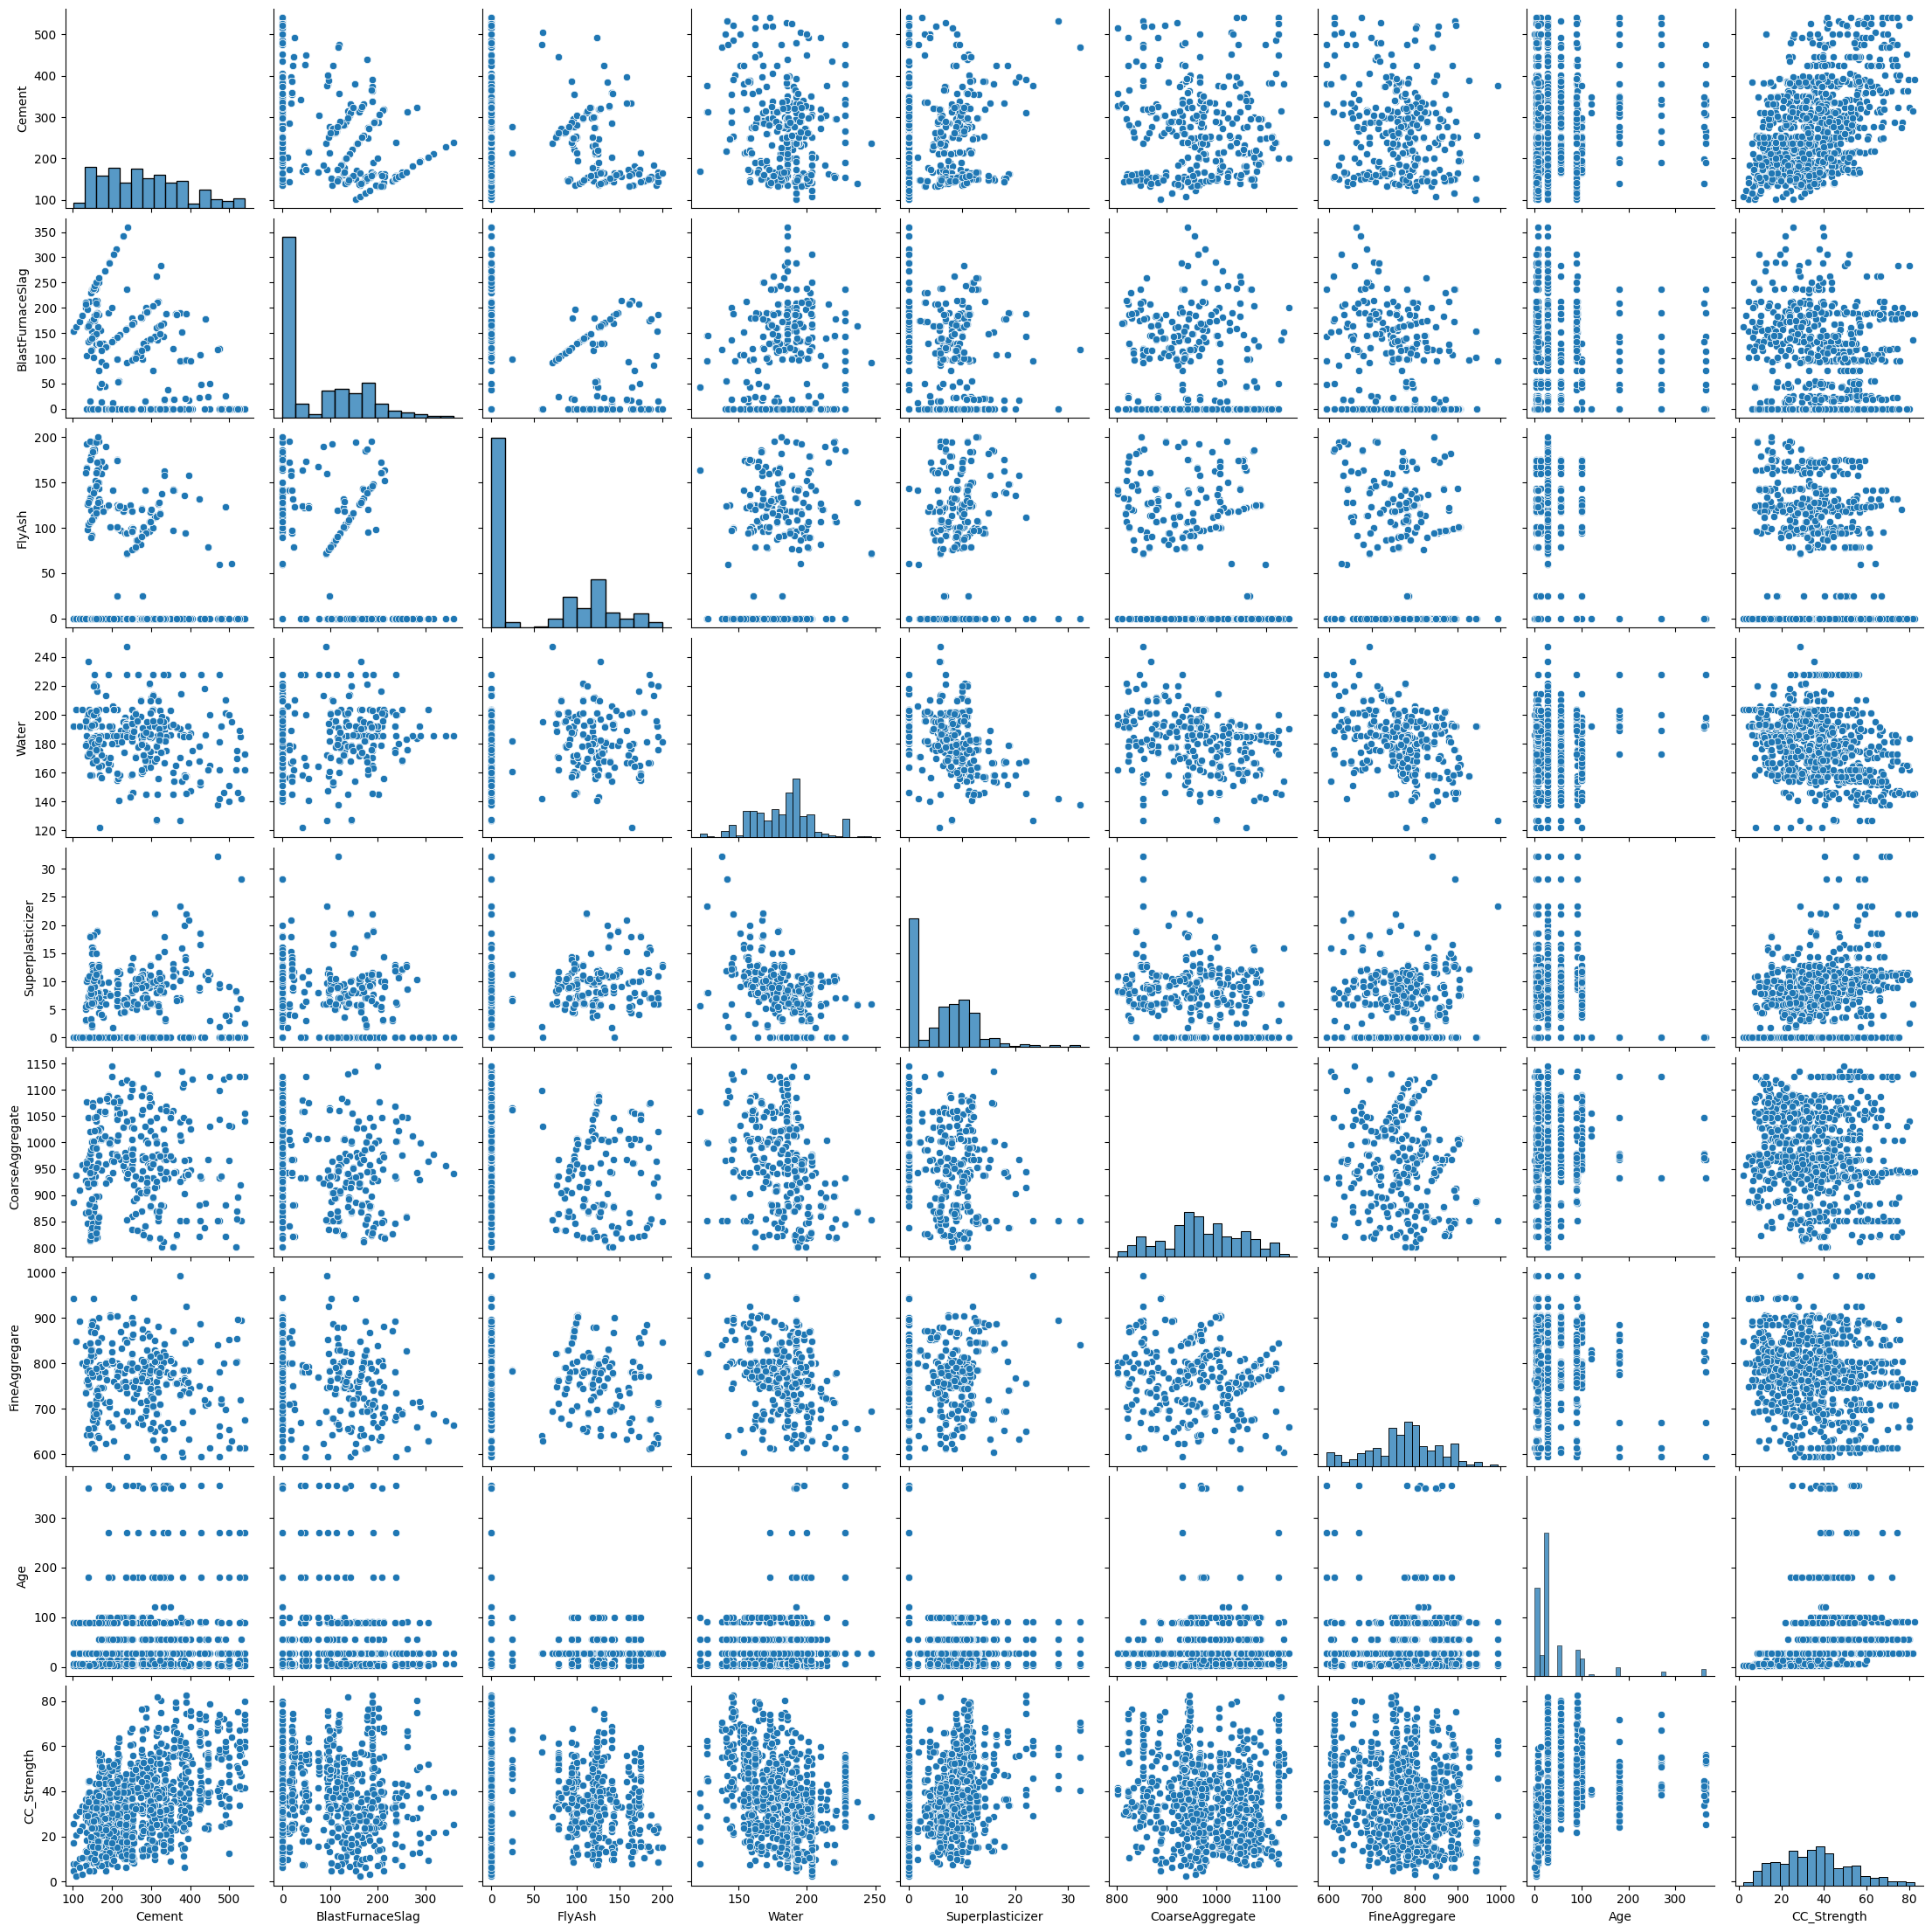

In [4]:
#Affichage d'un scatterplot pour chaque pair de variables
sns.pairplot(data)
plt.show()
#for interpretation
#• When high values of v1 go with high values of v2, v1 and v2 are positively
#associated.
#• When high values of v1 go with low values of v2, v1 and v2 are negatively
#associated.

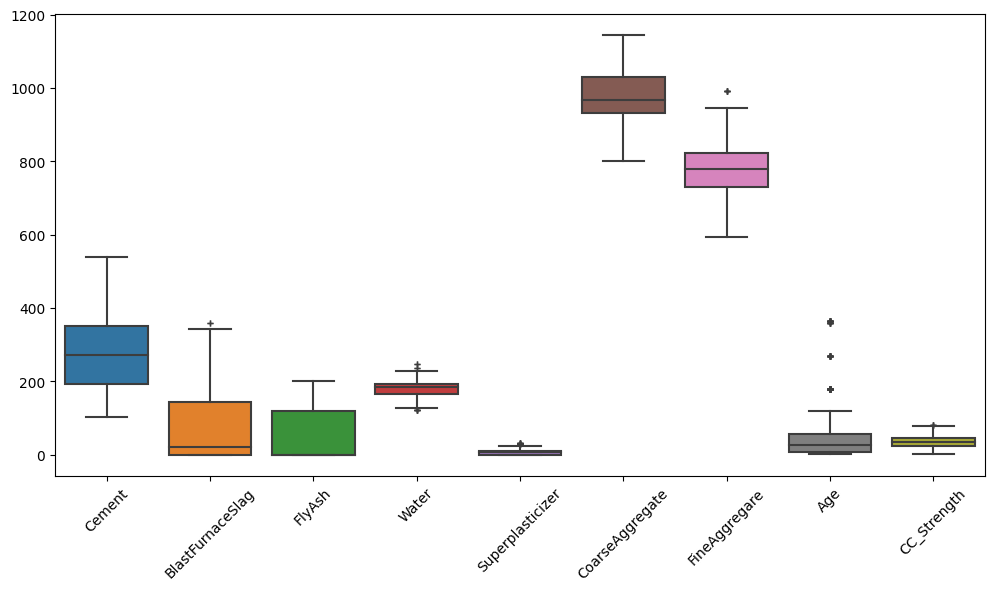

In [5]:
# Vérification des valeurs aberrantes
#Boxplots (see “Percentiles and Boxplots” on page 20) are a simple way to visually
#compare the distributions of a numeric variable grouped according to a categorical variable
plt.subplots(figsize=(12, 6))#aggrandir la figure
ax = sns.boxplot(data=data,flierprops={"marker": "+"})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);# faire roter les labels

#Alaska stands out as having the fewest delays, while American has the most delays:
# the lower quartile for American is higher than the upper quartile for Alaska.

Variable  Cement


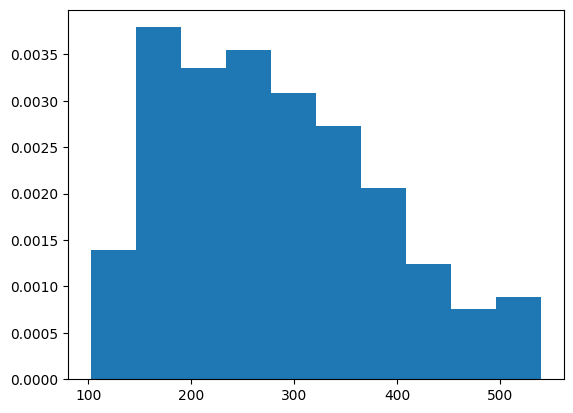

Variable  BlastFurnaceSlag


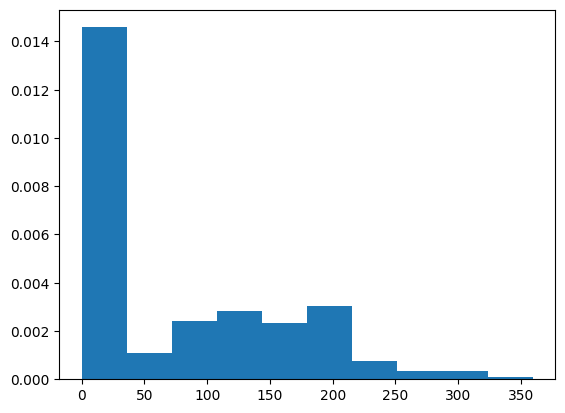

Variable  FlyAsh


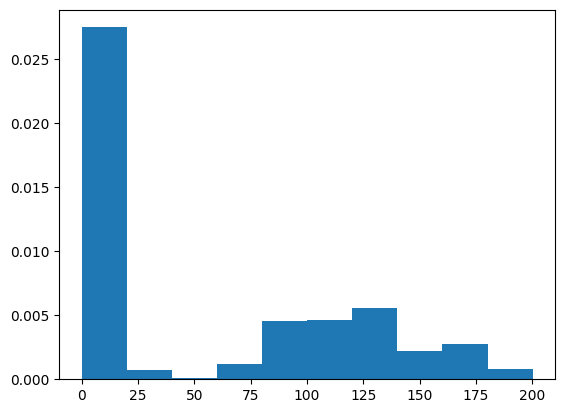

Variable  Water


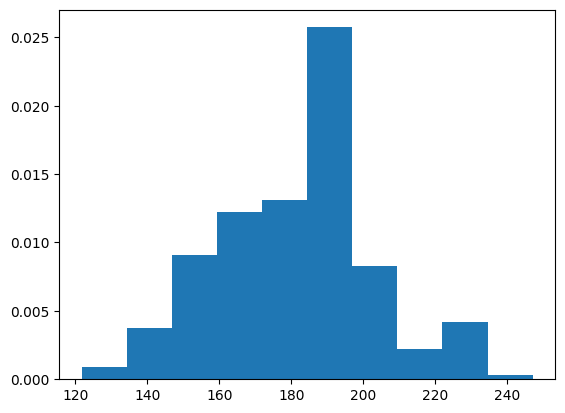

Variable  Superplasticizer


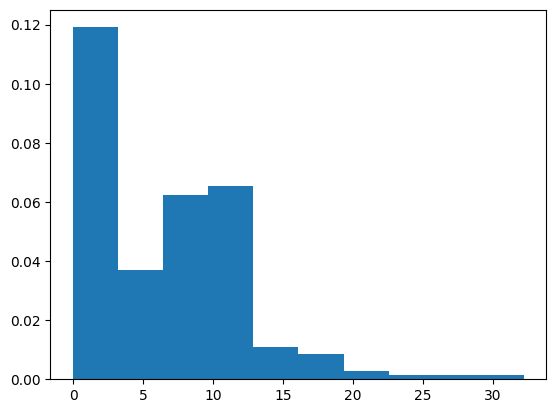

Variable  CoarseAggregate


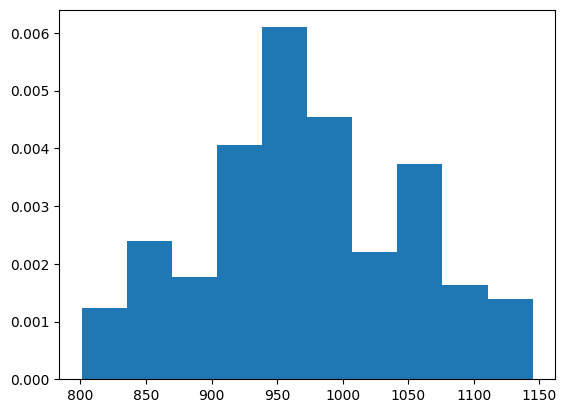

Variable  FineAggregare


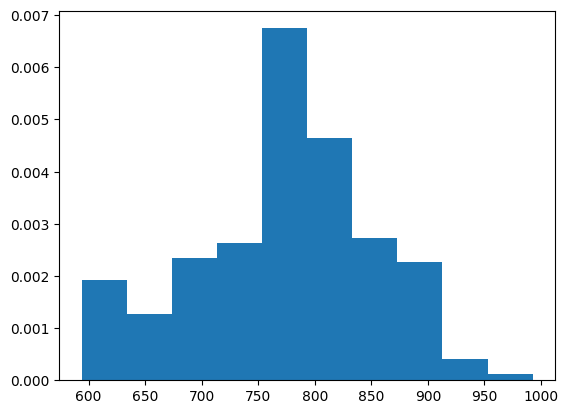

Variable  Age


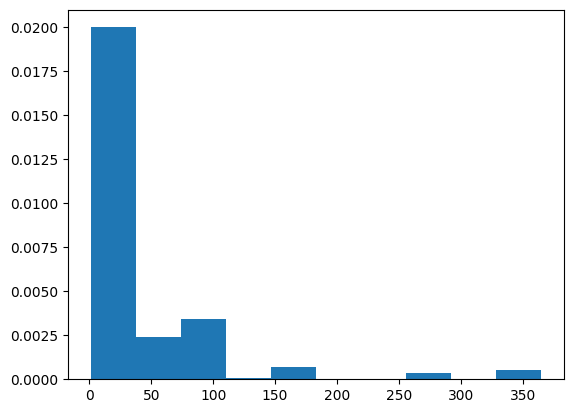

Variable  CC_Strength


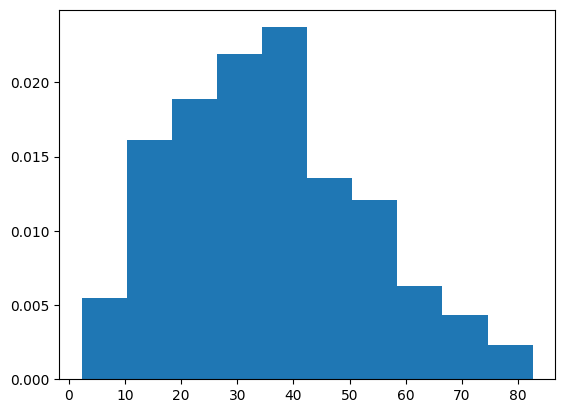

In [6]:
#histogramme de chaque variable
for name in data.columns:
  print('Variable ', name)
  plt.hist(data[name],density=True)
  plt.show()

/tmp/ipykernel_4703/3999641302.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i],color='green',rug=True)
/tmp/ipykernel_4703/3999641302.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i],color='green',rug=True)
/tmp/ipykernel_4703/3999641302.py:12: UserWarning: 

`

ValueError: num must be 1 <= num <= 8, not 9

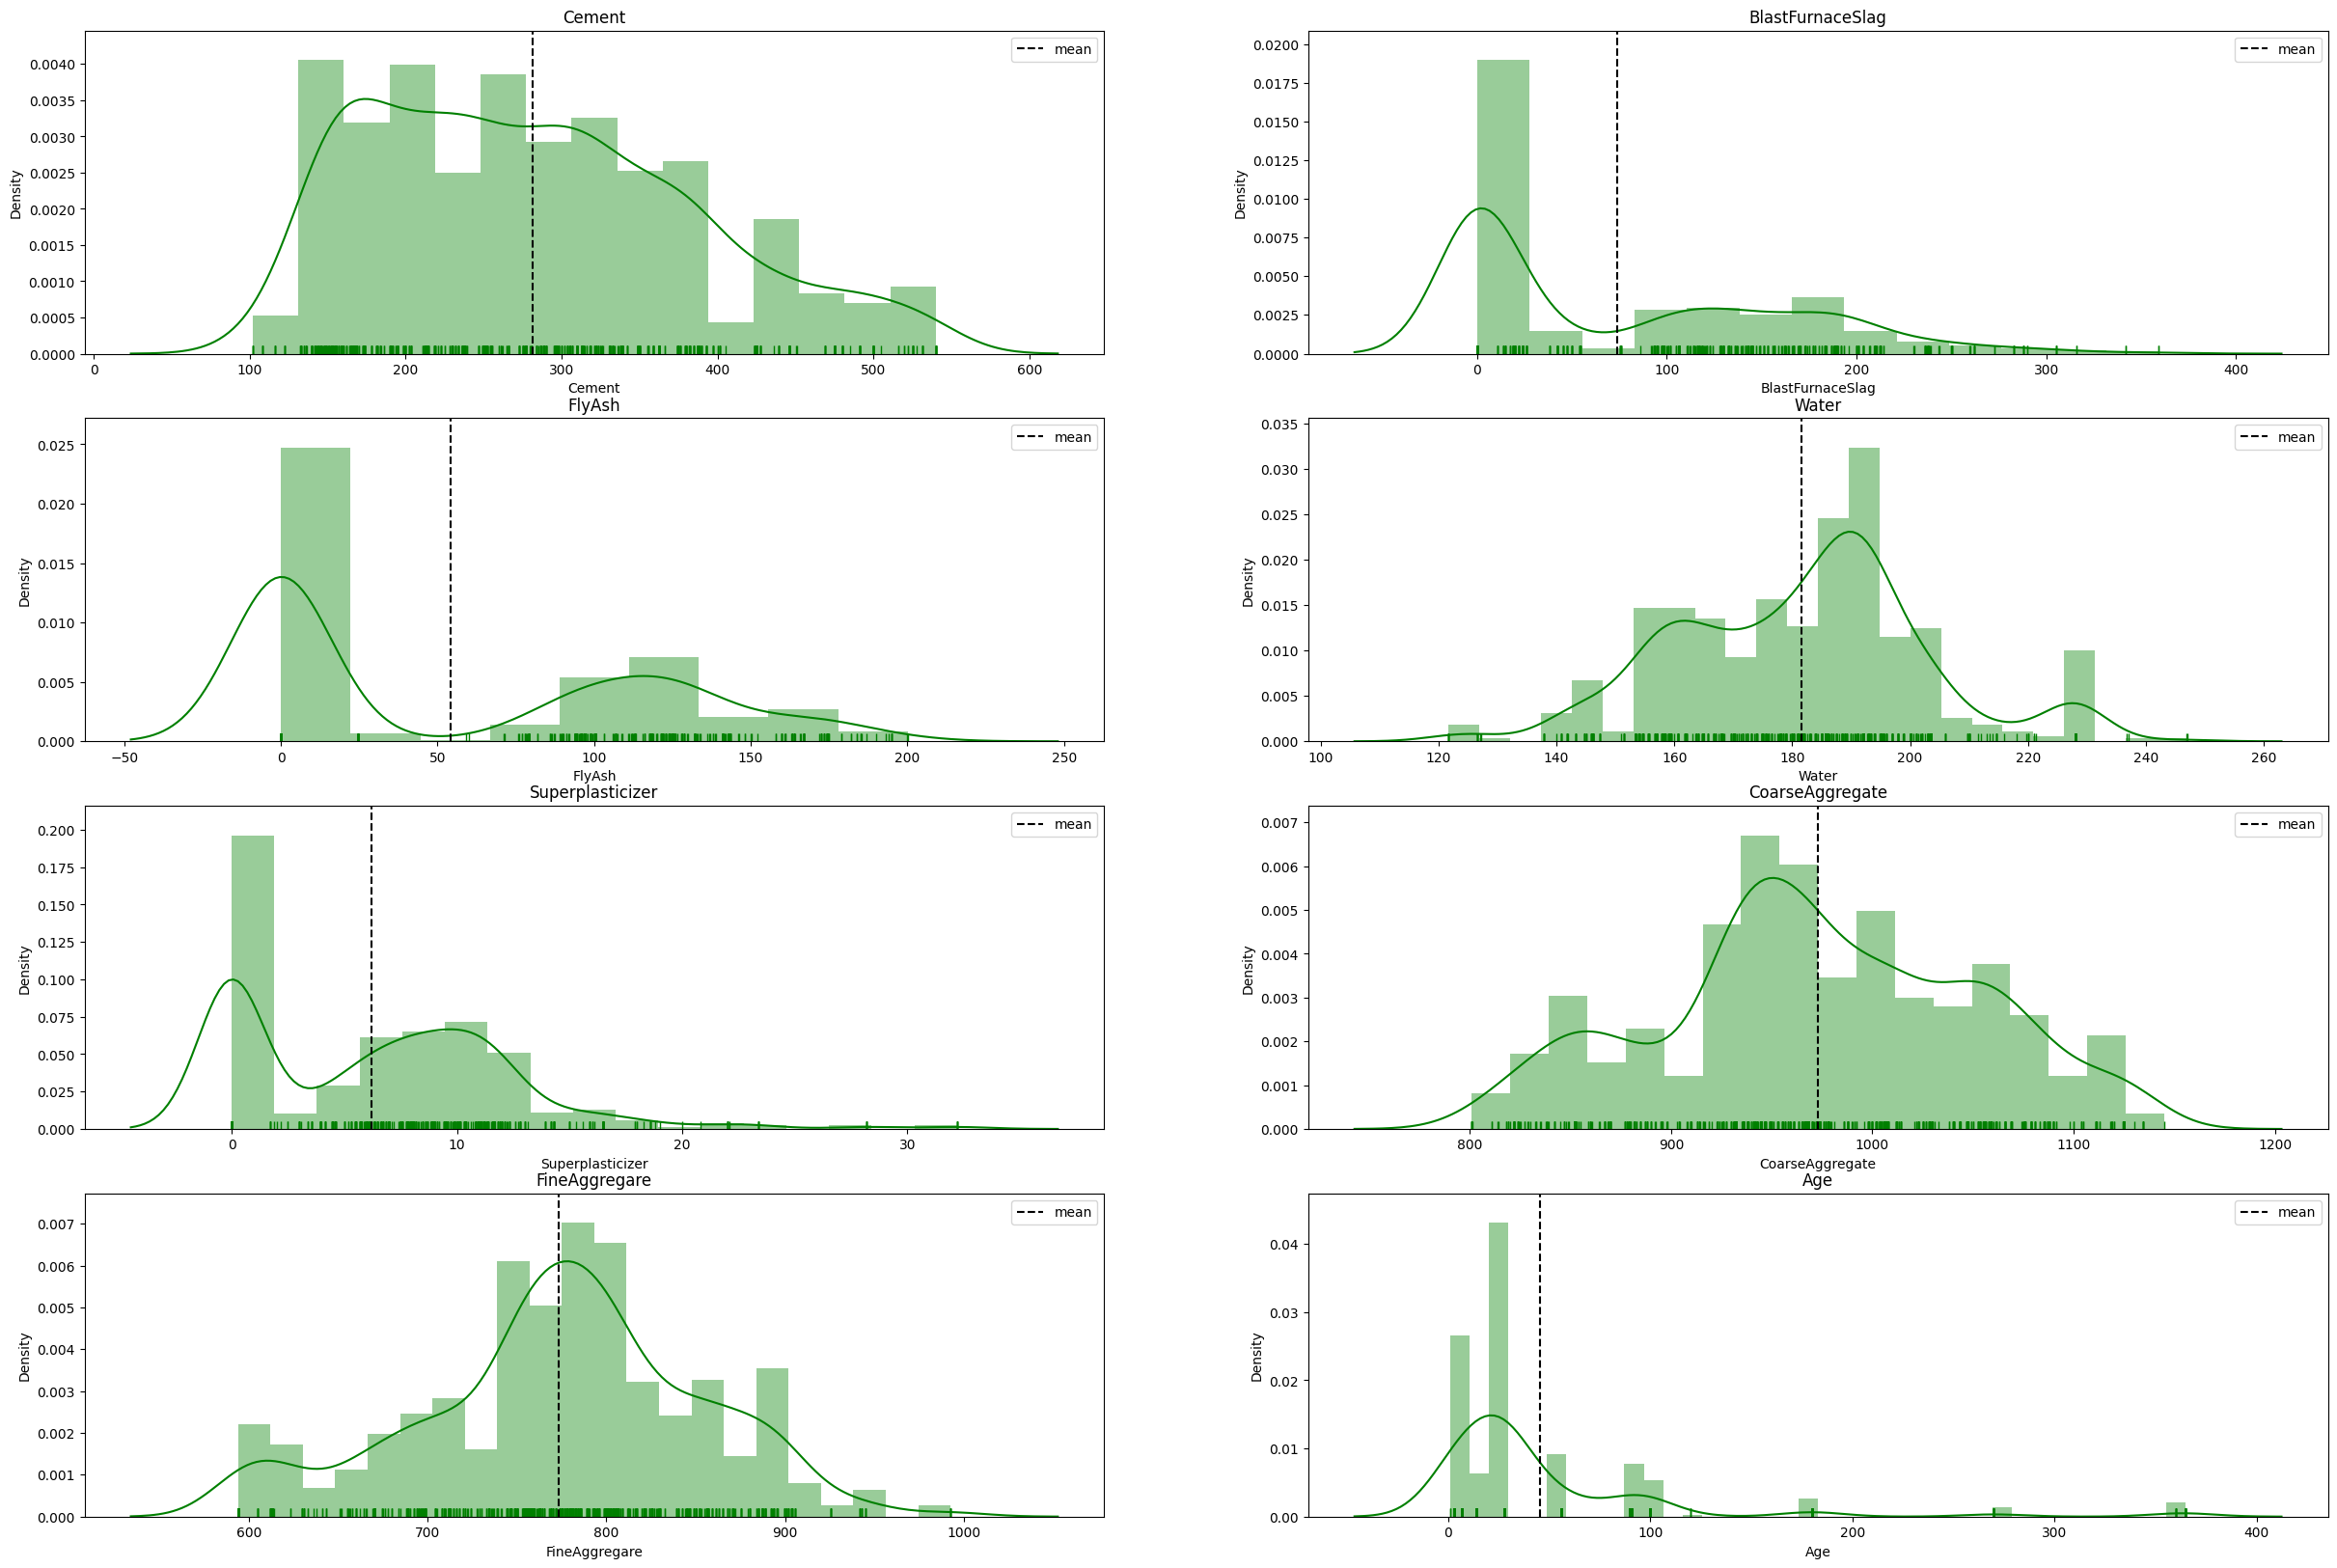

In [7]:
# Affichage du graphe de densite
#A key distinction from the histogram plotted in Figure 1-3 is the scale of the y-axis: a
#density plot corresponds to plotting the histogram as a proportion rather than counts
import itertools

cols = [i for i in data.columns if i != 'strength']

fig = plt.figure(figsize=(30, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(data[i],color='green',rug=True)
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
#     plt.xlabel(i)

In [8]:
data.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


#### 1)La normalisation du dataset

In [9]:
# Normalisation z-score ou standardisation
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

normData=scaler.fit_transform(data)

normData

array([[ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  2.64519215],
       [ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  1.5612771 ],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -2.24091255,
         3.55306569,  0.26660766],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ...,  0.08012724,
        -0.27973311, -0.7259282 ],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.19118775,
        -0.27973311, -0.18264932],
       [-0.19401043,  0.30850389,  0.37696733, ..., -0.15072887,
        -0.27973311, -0.20461667]])

In [10]:
# Convertir le tableau obtenu en un dataframe
normData=pd.DataFrame(normData)
normData

,0,1,2,3,4,5,6,7,8
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753
...,...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488241,0.564569,-0.092122,0.451695,-1.323003,-0.065874,-0.279733,0.507051
1026,0.392837,-0.856886,0.960095,0.676201,0.702927,-1.994679,0.496916,-0.279733,-0.277827
1027,-1.270057,0.759585,0.850661,0.521599,-0.017270,-1.036061,0.080127,-0.279733,-0.725928
1028,-1.168580,1.308072,-0.847132,-0.279518,0.853666,0.214646,0.191188,-0.279733,-0.182649


In [11]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age", "CC_Strength"]
curr_col_names = list(normData.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

normData = normData.rename(columns=mapper)

normData.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753


In [12]:
normData.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
count,1.030000e+03,1030.000000,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,9.657862e-17,0.000000,2.759389e-17,3.587206e-16,-2.759389e-17,2.276496e-16,-1.931572e-16,2.069542e-17,2.759389e-16
std,1.000486e+00,1.000486,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715219e+00,-0.856886,-8.471320e-01,-2.802333e+00,-1.038944e+00,-2.212137e+00,-2.240913e+00,-7.073594e-01,-2.005443e+00
25%,-8.500258e-01,-0.856886,-8.471320e-01,-7.808013e-01,-1.038944e+00,-5.265140e-01,-5.319534e-01,-6.123314e-01,-7.252985e-01
50%,-7.912996e-02,-0.601776,-8.471320e-01,1.608624e-01,2.460198e-02,-6.328926e-02,7.401267e-02,-2.797331e-01,-8.235105e-02
75%,6.589771e-01,0.800751,1.001836e+00,4.888051e-01,6.627297e-01,7.267662e-01,6.291904e-01,1.637312e-01,6.179613e-01
max,2.477918e+00,3.310688,2.281122e+00,3.065497e+00,4.354156e+00,2.214232e+00,2.733101e+00,5.057677e+00,2.801689e+00


#### 2) Separation du jeu de donnees entre les variables caracteristiques et la variable cible

In [13]:
# Ici on fractionne notre dataset et 90 et 10 comme l'article de base (leur dataset etait de 1228 exemples)
from sklearn.model_selection import train_test_split

X = normData.iloc[:,:-1]
y = normData.iloc[:,-1]

#### 2) Fractionnment des donnees en jeu d'entrainement et de test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### 3) Entrainement des différents modèles

##### **a) Random Forest**

Model				 Phase 		 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 Train 		 0.114 		 0.013 		0.072 		0.987
Random Forest Regressor 	 Test 		 0.313 		 0.098 		0.226 		0.897


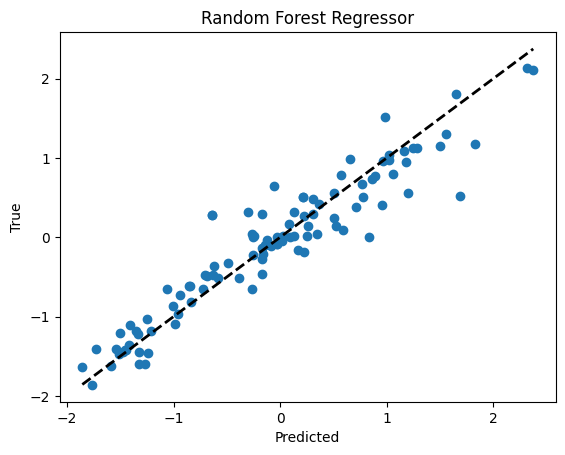

In [15]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from metrics.mean_poisson_deviance import mean_poisson_deviance
# from metrics.mean_gamma_deviance import mean_gamma_deviance 
# from metrics.max_error import max_error
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

y_pred_rfr = rfr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred,squared=False),mean_squared_error(y_train, y_train_pred),
            mean_absolute_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)))
print("""Random Forest Regressor \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_rfr, squared=False),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))


# afficher les resultats de predictions sur un graphe
plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

##### **b) Extremely Randomised trees(Extra Trees)**

Model			 Phase 		 RMSE 		 MSE 		 MAE 		 R2
Extra Trees Regressor	 Train 		 0.054 		 0.003 		0.004 		0.997
Extra Trees Regressor 	 Test 		 0.286 		 0.082 		0.192 		0.914


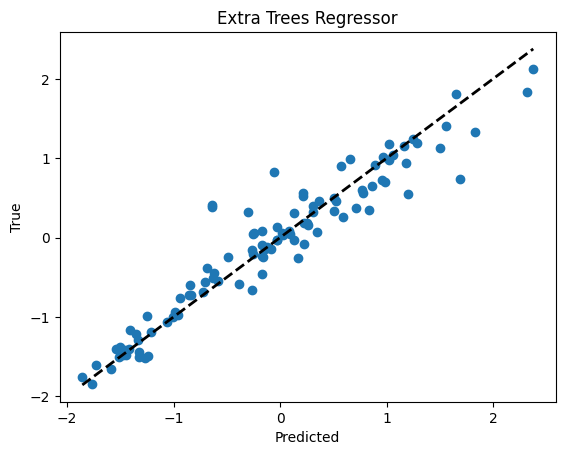

In [16]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
# y_pred_etr=etr.predict(X_test)
# etr_r2=etr.score(X_test,y_test)

# print("Model \t\t\t\t R2")
# print("Extra Trees Regressor \t\t{:.3f}".format(etr_r2))


# print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
# print("""Extra Trees Regressor \t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
#             np.sqrt(mean_squared_error(y_test, y_pred_etr)),mean_squared_error(y_test, y_pred_etr),
#             mean_absolute_error(y_test, y_pred_etr), r2_score(y_test, y_pred_etr)))

y_train_pred_etr = etr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

y_pred_etr = etr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Extra Trees Regressor\t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_etr,squared=False),mean_squared_error(y_train, y_train_pred_etr),
            mean_absolute_error(y_train, y_train_pred_etr), r2_score(y_train, y_train_pred_etr)))
print("""Extra Trees Regressor \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_etr, squared=False),mean_squared_error(y_test, y_pred_etr),
            mean_absolute_error(y_test, y_pred_etr), r2_score(y_test, y_pred_etr)))


# afficher les resultats de predictions sur un graphe
plt.scatter(y_test, y_pred_etr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Extra Trees Regressor")
plt.show()

##### **c) Adaptative Boosting(Adaboost)**

Model			 Phase 		 RMSE 		 MSE 		 MAE 		 R2
AdaBoost Regressor 	 Train 		 0.428 		 0.183 		0.359 		0.818
AdaBoost Regressor 	 Test 		 0.481 		 0.231 		0.399 		0.758


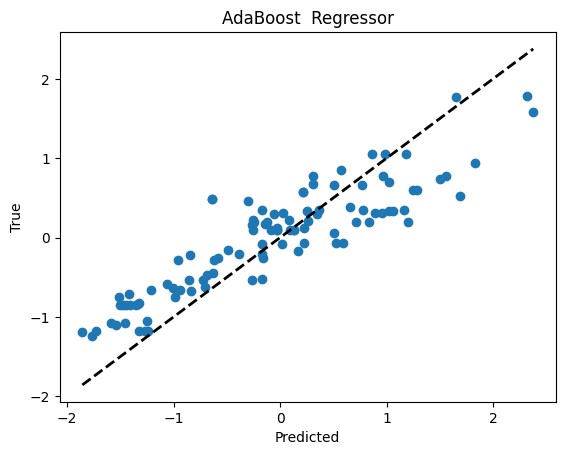

In [17]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
y_pred_abr=abr.predict(X_test)
# abr_r2=abr.score(X_test,y_test)

# print("Model \t\t\t\t R2")
# print("AdaBoost Regressor \t\t{:.3f}".format(abr_r2))

y_train_pred_abr = abr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

# y_pred_abr = abr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""AdaBoost Regressor \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_abr,squared=False),mean_squared_error(y_train, y_train_pred_abr),
            mean_absolute_error(y_train, y_train_pred_abr), r2_score(y_train, y_train_pred_abr)))
print("""AdaBoost Regressor \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_abr, squared=False),mean_squared_error(y_test, y_pred_abr),
            mean_absolute_error(y_test, y_pred_abr), r2_score(y_test, y_pred_abr)))



plt.scatter(y_test, y_pred_abr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("AdaBoost  Regressor")
plt.show()

##### **d) Gradient Boosting Machine(GBM)**

Model				 Phase 		 RMSE 		 MSE 		 MAE 		 R2
Gradient Boosting Regressor 	 Train 		 0.234 		 0.055 		0.176 		0.946
Gradient Boosting Regressor 	 Test 		 0.322 		 0.104 		0.239 		0.891


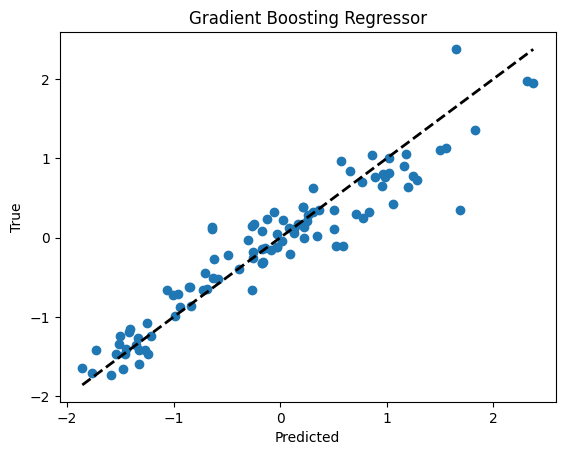

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr=gbr.predict(X_test)
# gbr_r2=gbr.score(X_test,y_test)

y_train_pred_gbr = gbr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

# y_pred_abr = abr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Gradient Boosting Regressor \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_gbr,squared=False),mean_squared_error(y_train, y_train_pred_gbr),
            mean_absolute_error(y_train, y_train_pred_gbr), r2_score(y_train, y_train_pred_gbr)))
print("""Gradient Boosting Regressor \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_gbr, squared=False),mean_squared_error(y_test, y_pred_gbr),
            mean_absolute_error(y_test, y_pred_gbr), r2_score(y_test, y_pred_gbr)))

plt.scatter(y_test, y_pred_gbr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Gradient Boosting Regressor")
plt.show()

##### **e) Extreme Gradient Boosting(XGBoost)**

In [19]:

import xgboost as xgb
from xgboost import XGBRegressor

xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred_xgbr=xgbr.predict(X_test)
xgbr_r2=xgbr.score(X_test,y_test)
xgbr_r1=xgbr.score(X_train,y_train)

# print("Model \t\t\t\t\t\t Phase \t\t\t R2")

# print(" Extreme Gradient Boosting Regressor \t\t Train \t\t\t{:.3f}".format(xgbr_r1))

# print(" Extreme Gradient Boosting Regressor \t\t Test\t\t\t{:.3f}".format(xgbr_r2))

y_train_pred_xgbr = xgbr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

# y_pred_abr = abr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Extreme Gradient Boosting Regressor \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_xgbr,squared=False),mean_squared_error(y_train, y_train_pred_xgbr),
            mean_absolute_error(y_train, y_train_pred_xgbr), r2_score(y_train, y_train_pred_xgbr)))
print("""Extreme Gradient Boosting Regressor \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_xgbr, squared=False),mean_squared_error(y_test, y_pred_xgbr),
            mean_absolute_error(y_test, y_pred_xgbr), r2_score(y_test, y_pred_xgbr)))

Model					 Phase 		 RMSE 		 MSE 		 MAE 		 R2
Extreme Gradient Boosting Regressor 	 Train 		 0.064 		 0.004 		0.026 		0.996
Extreme Gradient Boosting Regressor 	 Test 		 0.255 		 0.065 		0.165 		0.932


##### **f) Light Gradient Boosting Machine(LightGBM)**

In [20]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

lgbmr = LGBMRegressor()
lgbmr.fit(X_train, y_train)
y_pred_lgbmr=lgbmr.predict(X_test)
# lgbmr_r2=lgbmr.score(X_test,y_test)
# lgbmr_r1 = lgbmr.score(X_train, y_train)

# print("Model \t\t\t\t\t\t Phase \t\t\t R2")

# print(" Light Gradient Boosting Machine \t\t Train \t\t\t{:.3f}".format(lgbmr_r1))

# print(" Light Gradient Boosting Machine \t\t Test\t\t\t{:.3f}".format(lgbmr_r2))

y_train_pred_lgbmr = lgbmr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

# y_pred_abr = abr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Light Gradient Boosting Machine \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_lgbmr,squared=False),mean_squared_error(y_train, y_train_pred_lgbmr),
            mean_absolute_error(y_train, y_train_pred_lgbmr), r2_score(y_train, y_train_pred_lgbmr)))
print("""Light Gradient Boosting Machine \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_lgbmr, squared=False),mean_squared_error(y_test, y_pred_lgbmr),
            mean_absolute_error(y_test, y_pred_lgbmr), r2_score(y_test, y_pred_lgbmr)))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 927, number of used features: 8
[LightGBM] [Info] Start training from score 0.009573
Model					 Phase 		 RMSE 		 MSE 		 MAE 		 R2
Light Gradient Boosting Machine 	 Train 		 0.130 		 0.017 		0.084 		0.983
Light Gradient Boosting Machine 	 Test 		 0.243 		 0.059 		0.177 		0.938


##### **g) Categorical Boosting(CatBoost)**

In [25]:
import catboost as catb
from catboost import CatBoostRegressor
import time
catbr = CatBoostRegressor()
start = time.time()


catbr.fit(X_train, y_train)

end = time.time()
y_pred_catbr=catbr.predict(X_test)

catbr_r1=catbr.score(X_train,y_train)
catbr_r2=catbr.score(X_test,y_test)

# print("\nModel \t\t\t\t\t\t Phase \t\t\t R2")
# print(" Categorical Boosting \t\t Train \t\t\t{:.3f}".format(catbr_r1))
# print(" Categorical Boosting \t\t Test\t\t\t{:.3f}".format(catbr_r2))

y_train_pred_catbr = catbr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

# y_pred_abr = abr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Categorical Boosting \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_catbr,squared=False),mean_squared_error(y_train, y_train_pred_catbr),
            mean_absolute_error(y_train, y_train_pred_catbr), r2_score(y_train, y_train_pred_catbr)))
print("""Categorical Boosting \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_catbr, squared=False),mean_squared_error(y_test, y_pred_catbr),
            mean_absolute_error(y_test, y_pred_catbr), r2_score(y_test, y_pred_catbr)))

Learning rate set to 0.040456
0:	learn: 0.9780267	total: 1.97ms	remaining: 1.97s
1:	learn: 0.9526081	total: 3.62ms	remaining: 1.81s
2:	learn: 0.9328785	total: 5.22ms	remaining: 1.74s
3:	learn: 0.9093300	total: 9.64ms	remaining: 2.4s
4:	learn: 0.8875484	total: 11.6ms	remaining: 2.31s
5:	learn: 0.8654736	total: 16.3ms	remaining: 2.71s
6:	learn: 0.8439899	total: 18.4ms	remaining: 2.61s
7:	learn: 0.8256199	total: 20.4ms	remaining: 2.52s
8:	learn: 0.8084291	total: 23ms	remaining: 2.54s
9:	learn: 0.7897514	total: 25.7ms	remaining: 2.54s
10:	learn: 0.7713156	total: 27.3ms	remaining: 2.46s
11:	learn: 0.7553193	total: 28.6ms	remaining: 2.35s
12:	learn: 0.7393054	total: 29.8ms	remaining: 2.26s
13:	learn: 0.7245613	total: 30.9ms	remaining: 2.18s
14:	learn: 0.7093264	total: 32.7ms	remaining: 2.15s
15:	learn: 0.6965446	total: 34.1ms	remaining: 2.1s
16:	learn: 0.6834992	total: 36.3ms	remaining: 2.1s
17:	learn: 0.6700626	total: 37.5ms	remaining: 2.04s
18:	learn: 0.6572719	total: 38.8ms	remaining: 2s


In [26]:
temps=end-start
print(f'Temps d\'exécution : {temps:.2}ms')

Temps d'exécution : 2.1ms
